# Tips Dataset Analysis

## Introduction
This is an analysis of a famous dataset known as the tips dataset. In one particular resturant, a waiter collected data on all the customers they served over a few months [1].

The type of data it contains is as follows: 
- total_bill = the total bill, including tax, in US dollars
- tip = the tip in US dollars
- sex = the gender of the person paying bill (either male or female)
- smoker = indicates if the table was seated in the smoking area or not
- day = indicates the day on which the meal is served. Clearly the waiter only worked on Thursday, Friday, Saturday and Sundays.
- time = incidates what type of meal they were having either dinner or lunch
- size = how many people were at the table

A server's tips can be greatly influenced by various different things, many of which our waiter recorded! So the big question we are going to try and address throughout this project is do any of these factors affect tip rate, and if so how much do they influnce tip rate?

In [113]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# loading the tips dataset from seaborn
tips = sns.load_dataset("tips")

# get an inital look at the first pieces of data
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


So we have taken an inital look at our data just to get a sense of it, next we will check a few things to see if we can make any general observations about the data. I'm also going to have a look and see if there is any missing data that might disrupt our analysis.

In [14]:
tips.shape

(244, 7)

In [15]:
list(tips)

['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']

In [17]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


So we can see our data set has 244 rows and 7 columns. We also had a look at the column names, which match up with the descriptions I found earlier for our dataset. There are also no non-nulls meaning no missing data and all of the data types seem fine. So we can start analysing!

In [50]:
tips['tiprate'] = tips.tip / tips.total_bill * 100
# adding tiprate variable to dataset so we can see percentage

In [51]:
tips.describe()
# count tells us no missing data

,total_bill,tip,size,tiprate
count,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,16.080258
std,8.902412,1.383638,0.951100,6.107220
min,3.070000,1.000000,1.000000,3.563814
25%,13.347500,2.000000,2.000000,12.912736
50%,17.795000,2.900000,2.000000,15.476977
75%,24.127500,3.562500,3.000000,19.147549
max,50.810000,10.000000,6.000000,71.034483


In [18]:
bill = tips.sort_values("total_bill", ascending = False)
bill.head(20)
# biggest spenders seem to be male and at dinner and weekend

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
156,48.17,5.00,Male,No,Sun,Dinner,6
182,45.35,3.50,Male,Yes,Sun,Dinner,3
102,44.30,2.50,Female,Yes,Sat,Dinner,3
197,43.11,5.00,Female,Yes,Thur,Lunch,4
142,41.19,5.00,Male,No,Thur,Lunch,5
184,40.55,3.00,Male,Yes,Sun,Dinner,2
95,40.17,4.73,Male,Yes,Fri,Dinner,4


In [19]:
tiptotal = tips.sort_values("tip", ascending = False)
tiptotal.head(20)
# also biggest tipper seem to be male and at dinner and the weekend

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4
23,39.42,7.58,Male,No,Sat,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
141,34.30,6.70,Male,No,Thur,Lunch,6
214,28.17,6.50,Female,Yes,Sat,Dinner,3
183,23.17,6.50,Male,Yes,Sun,Dinner,4
47,32.40,6.00,Male,No,Sun,Dinner,4
239,29.03,5.92,Male,No,Sat,Dinner,3
88,24.71,5.85,Male,No,Thur,Lunch,2


In [20]:
tips.sex
tips["sex"].value_counts()
# more males than females

Male      157
Female     87
Name: sex, dtype: int64

In [21]:
tips["size"].nunique()
# 6 sizes of tables

6

In [22]:
tips.loc[tips["smoker"]=="Yes"].mean()
# smokers tip similar to mean tip of 2.99 across whole set

total_bill    20.756344
tip            3.008710
size           2.408602
dtype: float64

In [23]:
tips.pivot(columns='smoker', values='tip').describe()
# smokers didn't tip too much more

smoker,Yes,No
count,93.000000,151.000000
mean,3.008710,2.991854
std,1.401468,1.377190
min,1.000000,1.000000
25%,2.000000,2.000000
50%,3.000000,2.740000
75%,3.680000,3.505000
max,10.000000,9.000000


In [25]:
tips.loc[tips["sex"]=="Male"].mean()
#[2]

total_bill    20.744076
tip            3.089618
size           2.630573
dtype: float64

In [26]:
tips.pivot(columns='sex', values='tip').describe()
# men do infact seem to tip more

sex,Male,Female
count,157.000000,87.000000
mean,3.089618,2.833448
std,1.489102,1.159495
min,1.000000,1.000000
25%,2.000000,2.000000
50%,3.000000,2.750000
75%,3.760000,3.500000
max,10.000000,6.500000


In [28]:
tips.pivot(columns='day', values='tip').describe()
# average tip highest on sunday

day,Thur,Fri,Sat,Sun
count,62.000000,19.000000,87.000000,76.000000
mean,2.771452,2.734737,2.993103,3.255132
std,1.240223,1.019577,1.631014,1.234880
min,1.250000,1.000000,1.000000,1.010000
25%,2.000000,1.960000,2.000000,2.037500
50%,2.305000,3.000000,2.750000,3.150000
75%,3.362500,3.365000,3.370000,4.000000
max,6.700000,4.730000,10.000000,6.500000


In [29]:
tips.pivot(columns='time', values='tip').describe()

time,Lunch,Dinner
count,68.000000,176.000000
mean,2.728088,3.102670
std,1.205345,1.436243
min,1.250000,1.000000
25%,2.000000,2.000000
50%,2.250000,3.000000
75%,3.287500,3.687500
max,6.700000,10.000000


# Visualising Data

## Looking at tips in general histograms

C:\Users\Zoe\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


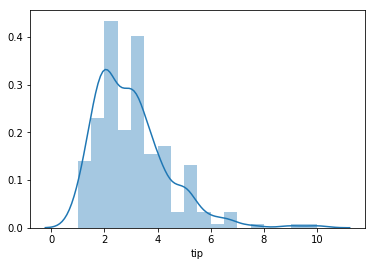

In [30]:
sns.distplot(tips["tip"])

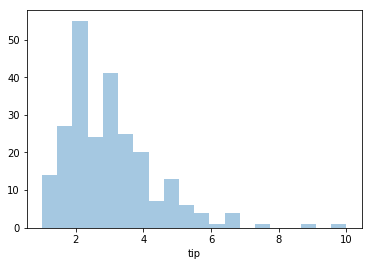

In [42]:
sns.distplot(tips['tip'], kde=False, bins=20);
# data is skewed more small tips than larger tips
# serveral outliers in big tips here also

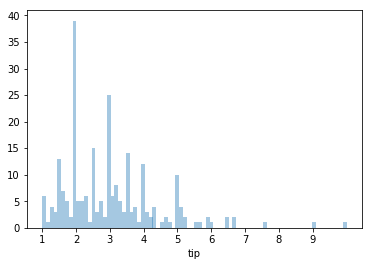

In [56]:
sns.distplot(tips['tip'], kde=False, bins=80);
plt.xticks(np.arange(1, 10, step=1.0))
plt.show()
# most tips between 2 and 4...no tips lower than 1 which we saw above with min
# assuming there is a realationship bewtween total bill and tips with the bill 
# being between 15 and 60 the resturant must not be too upscale
# peaks at 1,2,3,4,5 people are rounding tips..card vs cash?

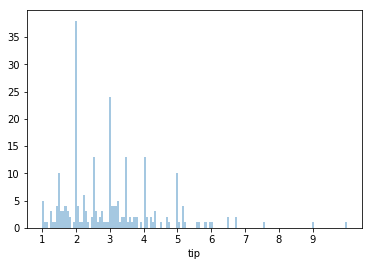

In [57]:
sns.distplot(tips['tip'], kde=False, bins=150);
plt.xticks(np.arange(1, 10, step=1.0))
plt.show()
# really clear peaks also at 1.5, 2.5, 3.5
# people also round to 50c

## Tip VS Total Bill

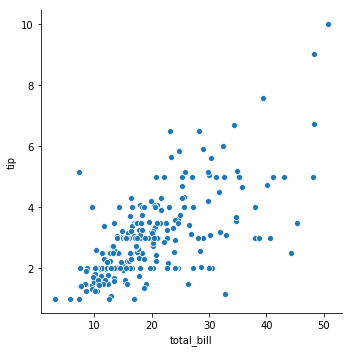

In [58]:
sns.relplot(x="total_bill", y="tip", data=tips);

more seem to pay lower tips and lower total bills, and less people tend tor spend alot here. skewed as the tips alone were.
lines of points visible at the tips level of 2,3,4 also at but not as easy to see as in histogram 1.50,2.50,3.50
amounts. tells us same again people tend to round to 1 or 50c

general linear relationship between tip and total bill. this is what we would expect. alot more people seem to be under the line than over so probably tip under the 15% or so?

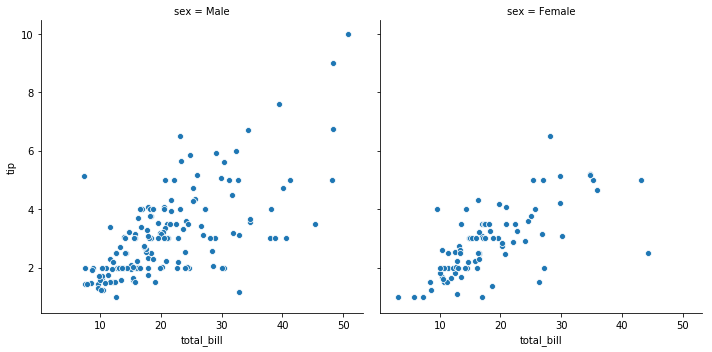

In [71]:
sns.relplot(x="total_bill", y="tip", col="sex", data=tips);

seems to be a few bigger bills paid by males. bigger tips are being paid by males. slope looks a little higher for males. having not looked at size yet we don't know much about context...maybe more tables of 2 might mean men tipping higher on dates or maybe a business lunch?


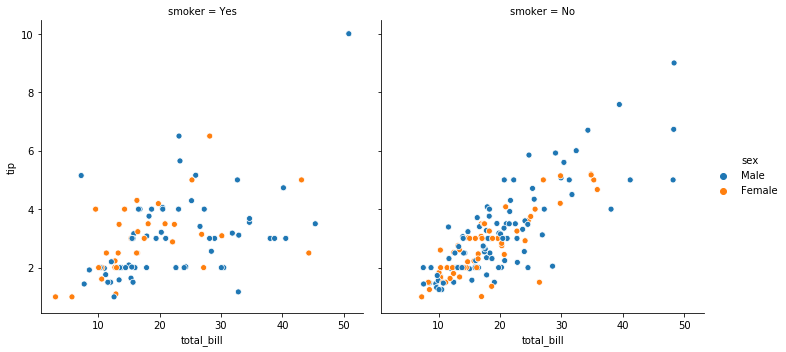

In [72]:
sns.relplot(x="total_bill", y="tip", hue="sex", col="smoker", data=tips);

smokers seem to be very erratic with lots of variablity. seems to be no consistent relationship.


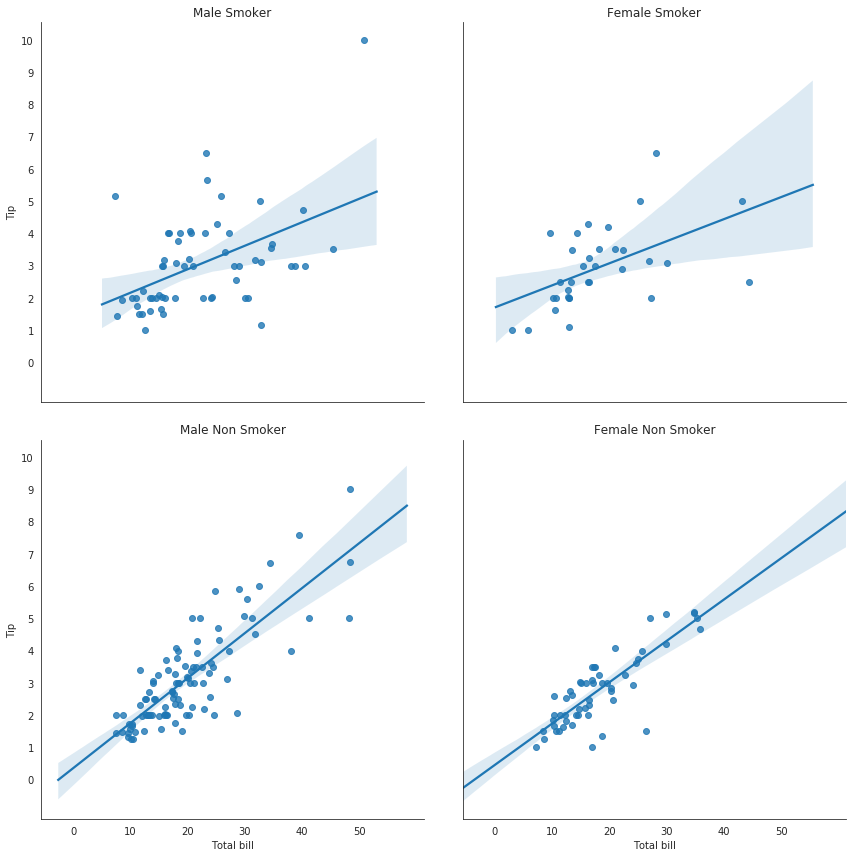

In [110]:
with sns.axes_style("white"):
    g = sns.FacetGrid(tips, row="smoker", col="sex", height=6)
g.map(sns.regplot, "total_bill", "tip");
g.set_axis_labels("Total bill", "Tip");
axes = g.axes.flatten()
plt.xticks(np.arange(0, 51, step=10.0))
plt.yticks(np.arange(0, 11, step=1.0))
axes[0].set_title("Male Smoker")
axes[1].set_title("Female Smoker")
axes[2].set_title("Male Non Smoker")
axes[3].set_title("Female Non Smoker")
g.fig.subplots_adjust(wspace=.1, hspace=.1);
#[3]

female non smokers seem to be consistent tippers looking at the clusters of their tips. 